## Advanced Regression Assignment

#### Problem Statement:

A US based company is looking at prospective properties to buy  at Australia to enter their market. They need a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

Essentially, the company wants —
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

**So interpretation is important!**

In [1020]:
# import all libraries required for building the model

#import NumPy and Pandas and read the dataset provided by Australia housing companies
import numpy as np
import pandas as pd
import scipy.stats as stats

#importing matplotlib and seaborn for data visualisation
import seaborn as sb
import matplotlib.pyplot as plt

#sklearn library to build the model and scale the data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from scipy.stats import norm
import scipy.stats as stats

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')


## Step 1. Reading the data

In [914]:
# reading the input file

housing_data = pd.read_csv("train.csv")

housing_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [915]:
housing_data.shape

(1460, 81)

In [916]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Step 2. EDA

In [917]:
# count the number of null values present in the data

round(housing_data.isnull().sum()/len(housing_data.index)*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

### Certain columns have greater than 85% missing values so we will be removing them

    -Alley
    -PoolQC
    -Miscfeature

In [918]:
housing_data.drop(['Alley','PoolQC','MiscFeature'],axis=1,inplace = True)

housing_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... 3SsnPorch ScreenPorch PoolArea Fence MiscVal  \
0    AllPub    Inside  ...         0           0        0   NaN       0   
1    AllPub       FR2  ...         0           0        0   NaN       0   
2    AllPub    Inside  ...         0           0        0   NaN       0   
3    AllPub    Corner  ...         0           0        0   NaN       0   
4    AllPub       FR2  ...         0           0        0   NaN       0   

  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0      2    2008        WD         Normal     208500  
1      5    2007        WD         Normal     181500  
2      9    2008        WD         Normal     223500  
3      2    2006        WD        Abnorml     140000  
4     12    2008        WD         Normal     250000  

[5 rows x 78 columns]

In [919]:
# count the number of null values present in the data

round(housing_data.isnull().sum()/len(housing_data.index)*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 78, dtype: float64

#### Checking the correlation between numerical columns

<Axes: >

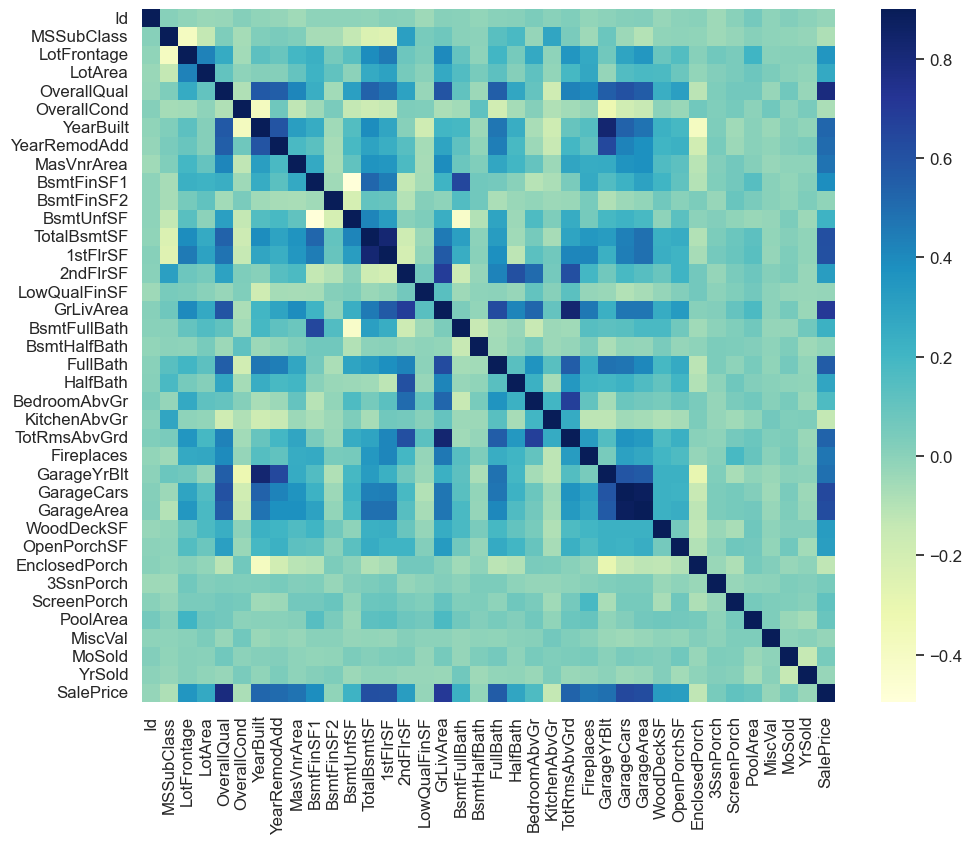

In [920]:
#Correlation map to see how features are correlated with SalePrice
corrmat = housing_data.corr(numeric_only=True)
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True,cmap="YlGnBu")

## Inference:
- Garage Cars and Garage Arre are highly corelated
- OverallQual has the highest correlation with SalesPrice
- Below Features van play important roles in determining the SalePrice as per the correlation matrix:
   1. OverallQual
   2. GrLivArea
   3. GarageCars
   4. GarageArea
   5. TotalBsmtSF
   6. 1stFlrSF
   7. FullBath
   8. YearBuilt#### From the pairplot given above we can see that some of the numerical colums are highly related with the sales price

    - LotFrontage
    - Overall Quality
    - Year Built
    - Year removeadd
    - MasVnrArea
    - TotalBsmn SF
    - 1st Foor SF
    - Gr ving Area
    - Fullbath
    - Fireplaces
    - Garage Area
    
#### We will be keeping them in our consideration while building our model
    

#### Let us also check what are the most corelated values present in the data from the ~80 odd variables

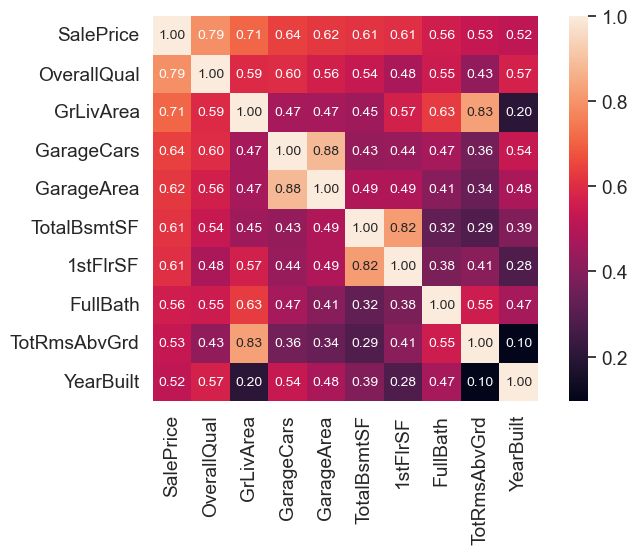

In [921]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### We can see from the above chart that the top 10 variables are similar to what we had initially deciphered

    - OverallQual - It is obvious that having a good quality house would fetch bigger price
    - Grlivarea - More the area of the floor above the ground floor, greater is the price
    - Garage cars, garage area, total basement SF, 1st floor SF -Seems to make sense 

#### Let us plot the graphs between some of these important numerical variables and see if we see any pattern

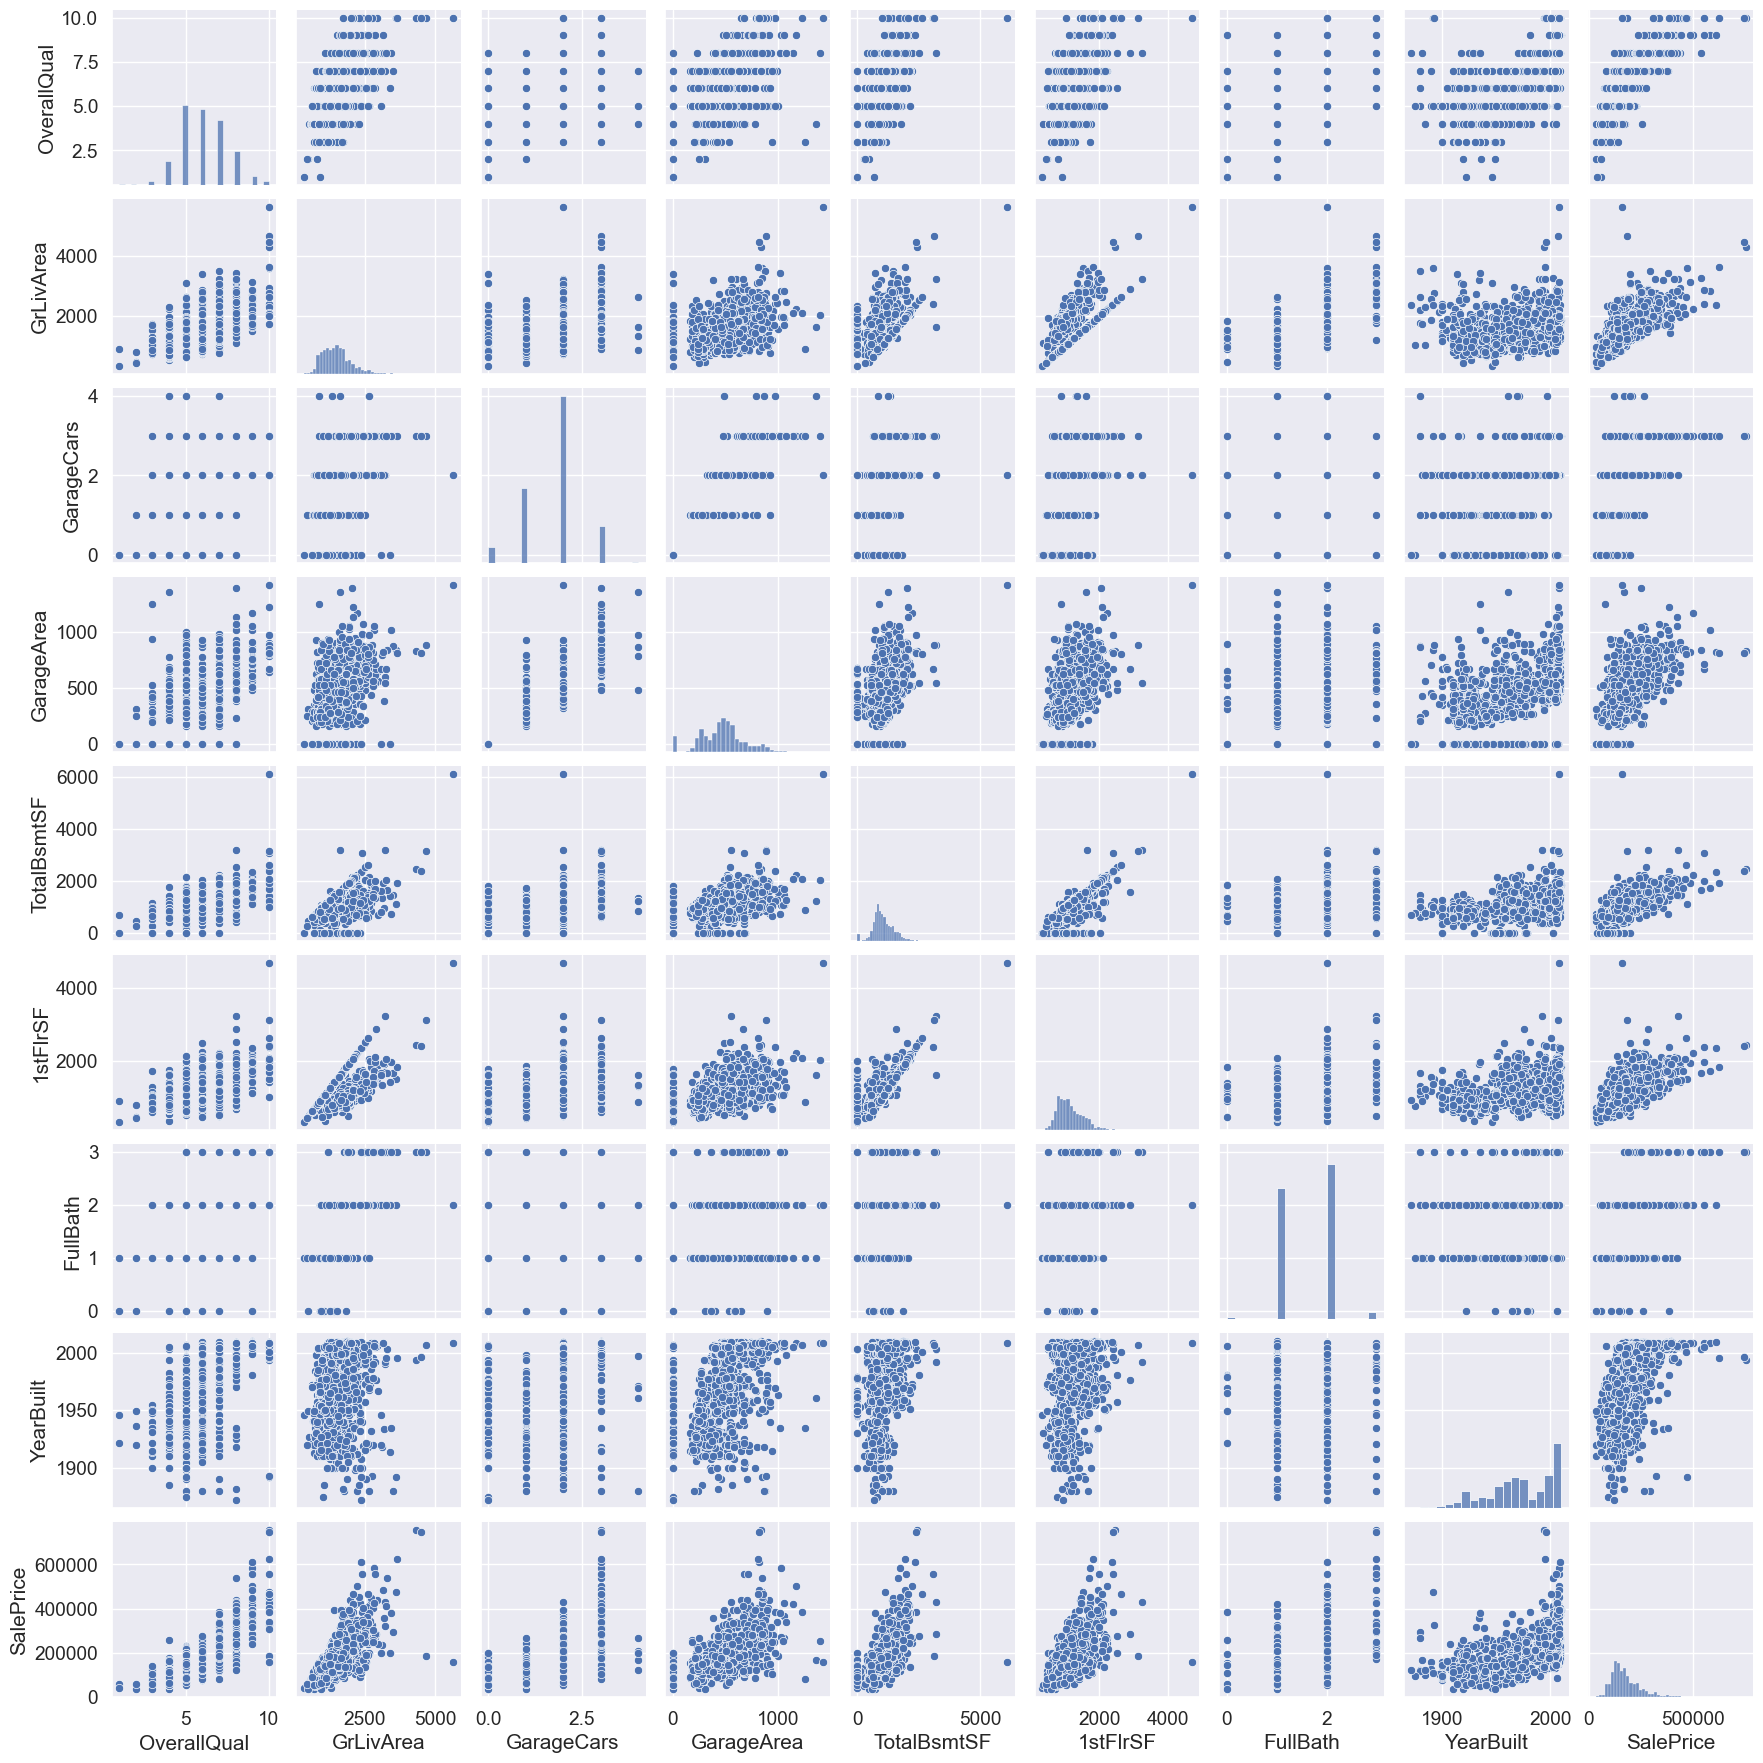

In [922]:
## Plotting Pairplot for Numerical Values
varnumerical=['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','YearBuilt','SalePrice']
sb.pairplot(housing_data[varnumerical],height=2)
plt.show()




#### Now let us see what % of of data is missing (apart from the 3 we have already removed) and how can we treat them

In [923]:
total = housing_data.isnull().sum().sort_values(ascending=False)
percent = (housing_data.isnull().sum()/housing_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
Fence          1179  0.807534
MasVnrType      872  0.597260
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageYrBlt      81  0.055479
GarageType       81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
GarageCond       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtQual         37  0.025342
BsmtCond         37  0.025342
BsmtFinType1     37  0.025342
MasVnrArea        8  0.005479
Electrical        1  0.000685
Fireplaces        0  0.000000
KitchenQual       0  0.000000
KitchenAbvGr      0  0.000000
BedroomAbvGr      0  0.000000

#### We notice that 'Fence' has ~81% of the data missing and hence can be dropped

In [924]:
housing_data['Fence'].value_counts()

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

In [925]:
housing_data.drop(['Fence'],axis=1,inplace = True)

housing_data

##### Dropping Id as it has no relevence in data prediction

In [926]:
housing_data.drop(['Id'],axis=1,inplace = True)

In [927]:
housing_data.shape

(1460, 76)

In [928]:
housing_data['FireplaceQu'].value_counts()/len(housing_data['FireplaceQu'])*100

FireplaceQu
Gd    26.027397
TA    21.438356
Fa     2.260274
Ex     1.643836
Po     1.369863
Name: count, dtype: float64

In [929]:
housing_data['LotFrontage'].value_counts()/len(housing_data['LotFrontage'])*100

LotFrontage
60.0     9.794521
70.0     4.794521
80.0     4.726027
50.0     3.904110
75.0     3.630137
           ...   
137.0    0.068493
141.0    0.068493
38.0     0.068493
140.0    0.068493
46.0     0.068493
Name: count, Length: 110, dtype: float64

In [930]:
housing_data['GarageCond'].value_counts()/len(housing_data['GarageCond'])*100

GarageCond
TA    90.821918
Fa     2.397260
Gd     0.616438
Po     0.479452
Ex     0.136986
Name: count, dtype: float64

In [931]:
housing_data['GarageType'].value_counts()/len(housing_data['GarageType'])*100

GarageType
Attchd     59.589041
Detchd     26.506849
BuiltIn     6.027397
Basment     1.301370
CarPort     0.616438
2Types      0.410959
Name: count, dtype: float64

In [932]:
housing_data['GarageYrBlt'].value_counts()/len(housing_data['GarageYrBlt'])*100

GarageYrBlt
2005.0    4.452055
2006.0    4.041096
2004.0    3.630137
2003.0    3.424658
2007.0    3.356164
            ...   
1927.0    0.068493
1900.0    0.068493
1906.0    0.068493
1908.0    0.068493
1933.0    0.068493
Name: count, Length: 97, dtype: float64

In [933]:
housing_data['GarageFinish'].value_counts()/len(housing_data['GarageFinish'])*100

GarageFinish
Unf    41.438356
RFn    28.904110
Fin    24.109589
Name: count, dtype: float64

In [934]:
housing_data['GarageQual'].value_counts()/len(housing_data['GarageQual'])*100

GarageQual
TA    89.794521
Fa     3.287671
Gd     0.958904
Ex     0.205479
Po     0.205479
Name: count, dtype: float64

In [935]:
housing_data['BsmtExposure'].value_counts()/len(housing_data['BsmtExposure'])*100

BsmtExposure
No    65.273973
Av    15.136986
Gd     9.178082
Mn     7.808219
Name: count, dtype: float64

In [936]:
housing_data['BsmtFinType2'].value_counts()/len(housing_data['BsmtFinType2'])*100

BsmtFinType2
Unf    86.027397
Rec     3.698630
LwQ     3.150685
BLQ     2.260274
ALQ     1.301370
GLQ     0.958904
Name: count, dtype: float64

In [937]:
housing_data['BsmtFinType1'].value_counts()/len(housing_data['BsmtFinType1'])*100

BsmtFinType1
Unf    29.452055
GLQ    28.630137
ALQ    15.068493
BLQ    10.136986
Rec     9.109589
LwQ     5.068493
Name: count, dtype: float64

In [938]:
housing_data['BsmtCond'].value_counts()/len(housing_data['BsmtCond'])*100

BsmtCond
TA    89.794521
Gd     4.452055
Fa     3.082192
Po     0.136986
Name: count, dtype: float64

In [939]:
housing_data['BsmtQual'].value_counts()/len(housing_data['BsmtQual'])*100

BsmtQual
TA    44.452055
Gd    42.328767
Ex     8.287671
Fa     2.397260
Name: count, dtype: float64

In [940]:
housing_data['MasVnrArea'].value_counts()/len(housing_data['MasVnrArea'])*100

MasVnrArea
0.0      58.972603
180.0     0.547945
72.0      0.547945
108.0     0.547945
120.0     0.479452
           ...    
562.0     0.068493
89.0      0.068493
921.0     0.068493
762.0     0.068493
119.0     0.068493
Name: count, Length: 327, dtype: float64

In [941]:
housing_data['MasVnrType'].value_counts()/len(housing_data['MasVnrType'])*100

MasVnrType
BrkFace    30.479452
Stone       8.767123
BrkCmn      1.027397
Name: count, dtype: float64

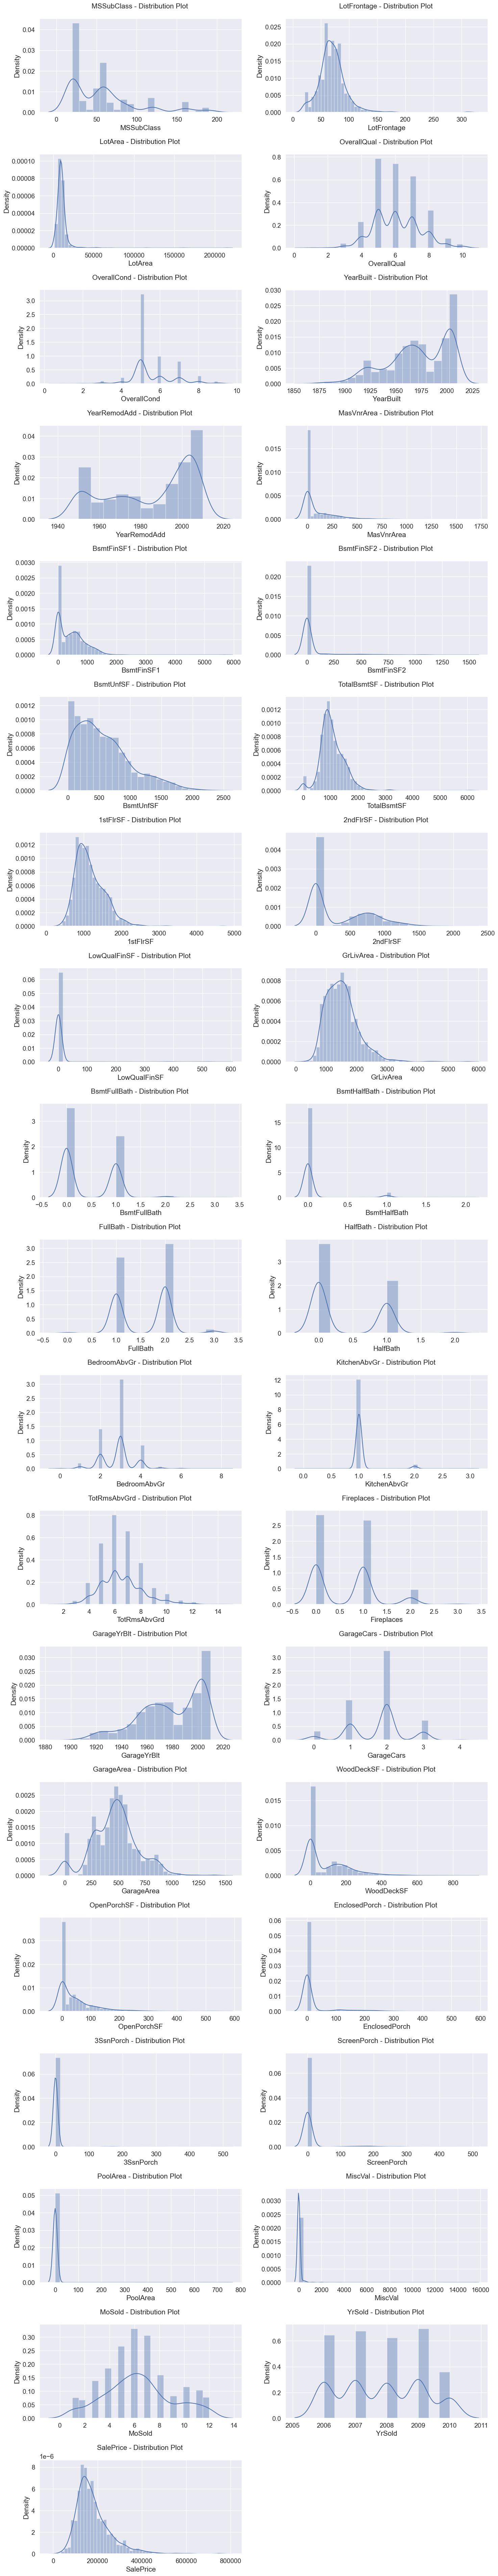

In [942]:
#Lets plot all the numerical columns and observe the outliers
Num_cols = [f for f in housing_data.columns if housing_data.dtypes[f] == 'int64' or housing_data.dtypes[f] == 'float64']
plt.figure(figsize=(15,100))
#The size of the plot
c=0
for i in Num_cols:
    c=c+1
    plt.subplot(25,2,c)
    plt.title(str(i)+" - Distribution Plot \n")
    sb.distplot(housing_data[str(i)])
    
plt.tight_layout()#to avoid overlapping layout
plt.show()#to display the plot

#### From the calculations above we can see that some of the columns can be removed directly as they are not adding any variance to our data and hence are not at all useful. 

    - BsmtCond
    - BsmtFinType2
    - BsmtExposure
    - GarageQual
    - GarageYrBlt
    - GarageCond
    - MasVnrArea

In [943]:
housing_data.drop(['BsmtCond','BsmtFinType2','BsmtExposure','GarageQual','GarageYrBlt','GarageCond','MasVnrArea'],axis=1,inplace = True)

In [944]:
housing_data.shape

(1460, 69)

In [945]:
qualitative = [f for f in housing_data.columns if housing_data.dtypes[f] == 'object']

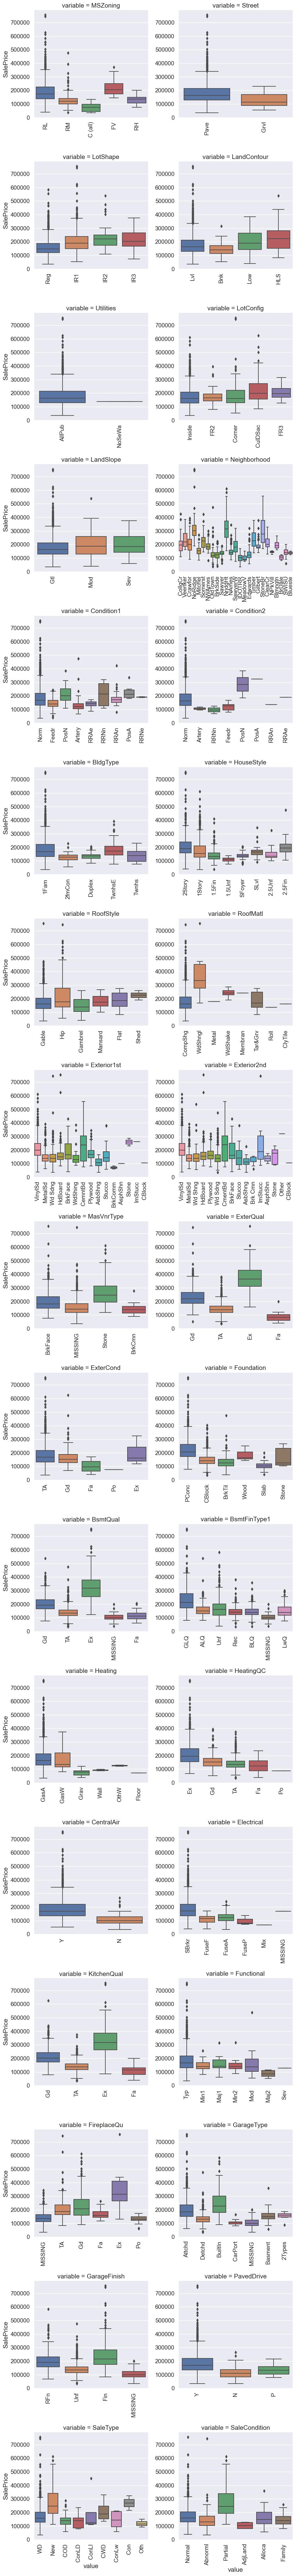

In [946]:
for c in qualitative:
    housing_data[c] = housing_data[c].astype('category')
    if housing_data[c].isnull().any():
        housing_data[c] = housing_data[c].cat.add_categories(['MISSING'])
        housing_data[c] = housing_data[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(housing_data, id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "SalePrice")

### As there are several categorical variables present so we need to plot a graph showcasing the highest value feature for sales by finding the uniqueness in the data provided. From above bar graph Feature having high value in Sale Predictions are :
- Neighbourhood
- ExterQual
- BsmtQual
- KitchenQual

#### Most of these variables have a diverse relationship with the 'Sales' and we will try to define some of them below -

In [947]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   int64   
 1   MSZoning       1460 non-null   category
 2   LotFrontage    1201 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   LotShape       1460 non-null   category
 6   LandContour    1460 non-null   category
 7   Utilities      1460 non-null   category
 8   LotConfig      1460 non-null   category
 9   LandSlope      1460 non-null   category
 10  Neighborhood   1460 non-null   category
 11  Condition1     1460 non-null   category
 12  Condition2     1460 non-null   category
 13  BldgType       1460 non-null   category
 14  HouseStyle     1460 non-null   category
 15  OverallQual    1460 non-null   int64   
 16  OverallCond    1460 non-null   int64   
 17  YearBuilt      1460 non-null   in

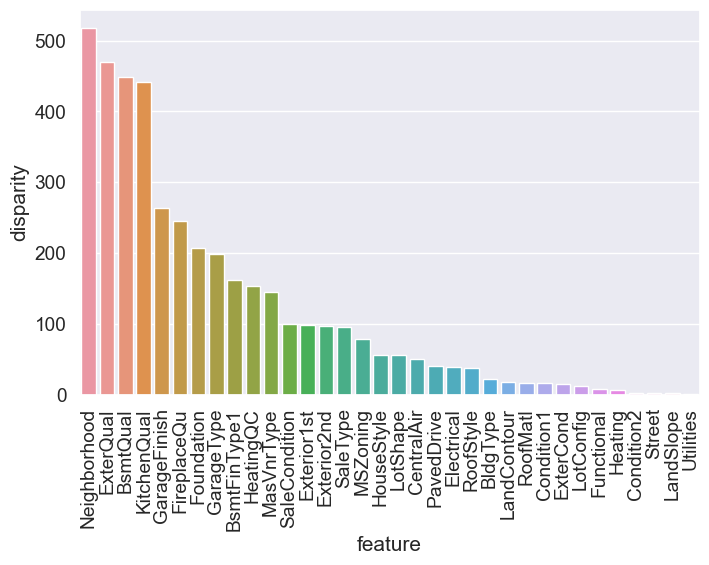

In [948]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(housing)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

#### From the above chart we can see that some of the majorly influencing variables are -

    - Neighbourhood
    - ExterQuality
    - Basement Quality
    - KitchenQuality

## Data Preprocessing - Tranforming the Target variable(SalePrice)

### Target variable
SalePrice is the variable we need to predict. So let's do some analysis on this variable first.

In [949]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   int64   
 1   MSZoning       1460 non-null   category
 2   LotFrontage    1201 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   LotShape       1460 non-null   category
 6   LandContour    1460 non-null   category
 7   Utilities      1460 non-null   category
 8   LotConfig      1460 non-null   category
 9   LandSlope      1460 non-null   category
 10  Neighborhood   1460 non-null   category
 11  Condition1     1460 non-null   category
 12  Condition2     1460 non-null   category
 13  BldgType       1460 non-null   category
 14  HouseStyle     1460 non-null   category
 15  OverallQual    1460 non-null   int64   
 16  OverallCond    1460 non-null   int64   
 17  YearBuilt      1460 non-null   in

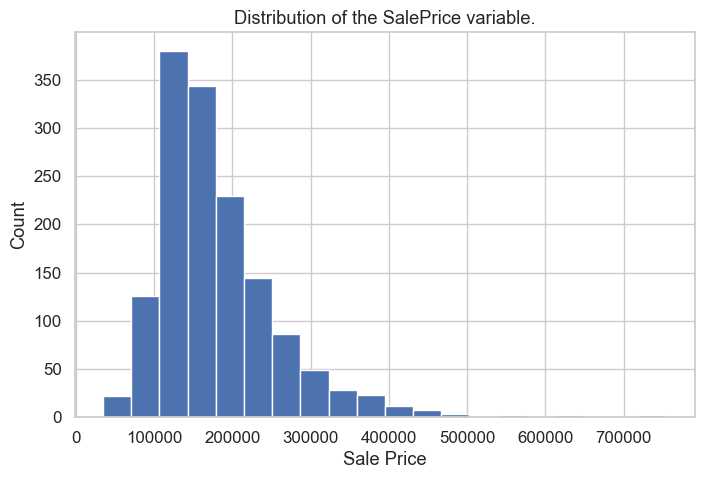

In [950]:
#Check the distribution the SalePrice
sb.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sb.distplot(housing_data['SalePrice'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}).set(xlabel='Sale Price', ylabel='Count');
plt.title("Distribution of the SalePrice variable.")
plt.show()

#### Now we will create dummy variables for the variables present in the current data set

In [951]:
housing_data.shape

(1460, 69)

In [952]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   int64   
 1   MSZoning       1460 non-null   category
 2   LotFrontage    1201 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   LotShape       1460 non-null   category
 6   LandContour    1460 non-null   category
 7   Utilities      1460 non-null   category
 8   LotConfig      1460 non-null   category
 9   LandSlope      1460 non-null   category
 10  Neighborhood   1460 non-null   category
 11  Condition1     1460 non-null   category
 12  Condition2     1460 non-null   category
 13  BldgType       1460 non-null   category
 14  HouseStyle     1460 non-null   category
 15  OverallQual    1460 non-null   int64   
 16  OverallCond    1460 non-null   int64   
 17  YearBuilt      1460 non-null   in

In [953]:
housing_data['LotFrontage'].fillna('0', inplace = True)

housing_data.head()

MSSubClass MSZoning LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL        65.0     8450   Pave      Reg         Lvl   
1          20       RL        80.0     9600   Pave      Reg         Lvl   
2          60       RL        68.0    11250   Pave      IR1         Lvl   
3          70       RL        60.0     9550   Pave      IR1         Lvl   
4          60       RL        84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Corner       Gtl  ...           272         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0        0       0       2    2008        WD         Normal    208500  
1        0       0       5    2007        WD         Normal    181500  
2        0       0       9    2008        WD         Normal    223500  
3        0       0       2    2006        WD        Abnorml    140000  
4        0       0      12    2008        WD         Normal    250000  

[5 rows x 69 columns]

In [954]:
#Final check of missing values 
Total_missing = housing_data.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*housing_data.isnull().sum()/housing_data.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values

Total_missing_values  Percent_missing_values
MSSubClass                       0                     0.0
HalfBath                         0                     0.0
Fireplaces                       0                     0.0
Functional                       0                     0.0
TotRmsAbvGrd                     0                     0.0
...                            ...                     ...
BsmtFinSF1                       0                     0.0
BsmtFinSF2                       0                     0.0
BsmtUnfSF                        0                     0.0
TotalBsmtSF                      0                     0.0
SalePrice                        0                     0.0

[69 rows x 2 columns]

In [955]:
housing_data.isna().any()[lambda x: x]

Series([], dtype: bool)

In [956]:
housing_data.isna().any()[lambda x: x]

Series([], dtype: bool)

In [957]:
#Final check of missing values 
Total_missing = housing_data.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*housing_data.isnull().sum()/housing_data.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values

Total_missing_values  Percent_missing_values
MSSubClass                       0                     0.0
HalfBath                         0                     0.0
Fireplaces                       0                     0.0
Functional                       0                     0.0
TotRmsAbvGrd                     0                     0.0
...                            ...                     ...
BsmtFinSF1                       0                     0.0
BsmtFinSF2                       0                     0.0
BsmtUnfSF                        0                     0.0
TotalBsmtSF                      0                     0.0
SalePrice                        0                     0.0

[69 rows x 2 columns]

### No data with missing values!!

In [958]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   int64   
 1   MSZoning       1460 non-null   category
 2   LotFrontage    1460 non-null   object  
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   LotShape       1460 non-null   category
 6   LandContour    1460 non-null   category
 7   Utilities      1460 non-null   category
 8   LotConfig      1460 non-null   category
 9   LandSlope      1460 non-null   category
 10  Neighborhood   1460 non-null   category
 11  Condition1     1460 non-null   category
 12  Condition2     1460 non-null   category
 13  BldgType       1460 non-null   category
 14  HouseStyle     1460 non-null   category
 15  OverallQual    1460 non-null   int64   
 16  OverallCond    1460 non-null   int64   
 17  YearBuilt      1460 non-null   in

In [959]:
# List of variables to map
def map_function(x):
    return x.map({'Ex':5,'Gd':5,'TA':4,'Fa':3,'Po':2,'Na':1,'NaN':0})
def map_function1(x):
    return x.map({'Gd':4,'Av':3,'Mn':2,'No':2,'Na':1,'NaN':0})
def map_function2(x):
    return x.map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0,'NaN':6})
def map_function3(x):
    return x.map({'Y':1,'N':0,'NaN':2})
def map_function4(x):
    return x.map({'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1,'NaN':0})
def map_function5(x):
    return x.map({'Fin':3,'RFn':2,'Unf':1,'NA':0,'Unknown':0,'NaN':0})
def map_function6(x):
    return x.map({'Y':2,'P':2,'N':0})
def map_function7(x):
    return x.map({'RL':2,'RM':1})
def map_function8(x):
    return x.map({'Pave':1})
def map_function9(x):
    return x.map({'Reg':4,'IR1':3,'IR2':2,'IR3':1})
def map_function10(x):
    return x.map({'Lvl':4,'Bnk':3,'HLS':2,'Low':1})

housing_data['ExterQual'] = housing_data[['ExterQual']].apply(map_function)
housing_data['ExterCond'] = housing_data[['ExterCond']].apply(map_function)
housing_data['BsmtQual'] = housing_data[['BsmtQual']].apply(map_function)
housing_data['BsmtFinType1'] = housing_data[['BsmtFinType1']].apply(map_function2)
housing_data['HeatingQC'] = housing_data[['HeatingQC']].apply(map_function)
housing_data['CentralAir'] = housing_data[['CentralAir']].apply(map_function3)
housing_data['KitchenQual'] = housing_data[['KitchenQual']].apply(map_function)
housing_data['Functional'] = housing_data[['Functional']].apply(map_function4)
housing_data['GarageFinish'] = housing_data[['GarageFinish']].apply(map_function5)
housing_data['PavedDrive'] = housing_data[['PavedDrive']].apply(map_function6)
housing_data['MSZoning'] = housing_data[['MSZoning']].apply(map_function7)
housing_data['Street'] = housing_data[['Street']].apply(map_function8)
housing_data['LotShape'] = housing_data[['LotShape']].apply(map_function9)
housing_data['LandContour'] = housing_data[['LandContour']].apply(map_function10)
housing_data['FireplaceQu'] = housing_data[['FireplaceQu']].apply(map_function)

In [976]:
housing_data['FireplaceQu'].value_counts()

FireplaceQu
5.0    404
4.0    313
3.0     33
2.0     20
Name: count, dtype: int64

In [975]:
housing_data.isna().any()[lambda x: x]

FireplaceQu    True
dtype: bool

In [977]:
## Imputing dummy value for NaN
housing_data['MSZoning'].fillna(0, inplace=True )
housing_data['Street'].fillna(0, inplace=True )
housing_data['BsmtQual'].fillna(0, inplace=True )
housing_data['BsmtFinType1'].fillna(0, inplace=True )
housing_data['GarageFinish'].fillna(0, inplace=True )
housing_data['FireplaceQu'].fillna(0, inplace=True )

In [978]:
# Creating dummies
dummy = pd.get_dummies(housing_data[['MSSubClass', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition']], drop_first=True)
dummy.head()

KeyError: "None of [Index(['MSSubClass', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',\n       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',\n       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',\n       'Heating', 'Electrical', 'GarageType', 'SaleType', 'SaleCondition'],\n      dtype='object')] are in the [columns]"

In [964]:
# Adding the results back to the cleaned dataframe
housing_data = pd.concat([housing_data, dummy], axis=1)
housing_data.head()

MSSubClass  MSZoning LotFrontage  LotArea  Street LotShape LandContour  \
0          60       2.0        65.0     8450     1.0        4           4   
1          20       2.0        80.0     9600     1.0        4           4   
2          60       2.0        68.0    11250     1.0        3           4   
3          70       2.0        60.0     9550     1.0        3           4   
4          60       2.0        84.0    14260     1.0        3           4   

  Utilities LotConfig LandSlope  ... SaleType_ConLI SaleType_ConLw  \
0    AllPub    Inside       Gtl  ...          False          False   
1    AllPub       FR2       Gtl  ...          False          False   
2    AllPub    Inside       Gtl  ...          False          False   
3    AllPub    Corner       Gtl  ...          False          False   
4    AllPub       FR2       Gtl  ...          False          False   

  SaleType_New SaleType_Oth SaleType_WD  SaleCondition_AdjLand  \
0        False        False        True                  False   
1        False        False        True                  False   
2        False        False        True                  False   
3        False        False        True                  False   
4        False        False        True                  False   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                 False                 False                  True   
1                 False                 False                  True   
2                 False                 False                  True   
3                 False                 False                 False   
4                 False                 False                  True   

  SaleCondition_Partial  
0                 False  
1                 False  
2                 False  
3                 False  
4                 False  

[5 rows x 205 columns]

In [965]:
# Dropping the columns whose dummies have been created
housing_data=housing_data.drop(['MSSubClass', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition'], axis = 1)

In [979]:
housing_data.shape

(1460, 184)

In [980]:
#Final check of missing values 
Total_missing = housing_data.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*housing_data.isnull().sum()/housing_data.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values

Total_missing_values  Percent_missing_values
MSZoning                                  0                     0.0
Exterior1st_Plywood                       0                     0.0
RoofMatl_WdShngl                          0                     0.0
Exterior1st_AsphShn                       0                     0.0
Exterior1st_BrkComm                       0                     0.0
...                                     ...                     ...
Neighborhood_Gilbert                      0                     0.0
Neighborhood_IDOTRR                       0                     0.0
Neighborhood_MeadowV                      0                     0.0
Neighborhood_Mitchel                      0                     0.0
SaleCondition_Partial                     0                     0.0

[184 rows x 2 columns]

In [981]:
housing_data.isna().any()[lambda x: x]

Series([], dtype: bool)

# Data Modeling -Test Train spliting

In [982]:
# model building - Test Train split
np.random.seed(0)
house_train,house_test = train_test_split(housing_data, train_size=0.7,random_state=100)
print(house_train.shape)
print(house_test.shape)

(1021, 184)
(439, 184)


In [983]:
# display the first five rows of train dataframe
house_train.head()

MSZoning LotFrontage  LotArea  Street LotShape LandContour  OverallQual  \
318        2.0        90.0     9900     1.0        4           1            7   
239        2.0        52.0     8741     1.0        4           4            6   
986        1.0        59.0     5310     1.0        4           4            6   
1416       1.0        60.0    11340     1.0        4           4            4   
390        2.0        50.0     8405     1.0        4           4            5   

      OverallCond  YearBuilt  YearRemodAdd  ...  SaleType_ConLI  \
318             5       1993          1993  ...           False   
239             4       1945          1950  ...           False   
986             8       1910          2003  ...           False   
1416            6       1885          1950  ...           False   
390             8       1900          1950  ...           False   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
318            False         False         False         True   
239            False         False         False         True   
986            False         False         False         True   
1416           False         False         False         True   
390            False         False         False         True   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
318                   False                 False                 False   
239                   False                 False                 False   
986                   False                 False                 False   
1416                  False                 False                 False   
390                   False                 False                 False   

      SaleCondition_Normal SaleCondition_Partial  
318                   True                 False  
239                   True                 False  
986                   True                 False  
1416                  True                 False  
390                   True                 False  

[5 rows x 184 columns]

In [984]:
# display the first five rows of test dataframe
house_test.head()

MSZoning LotFrontage  LotArea  Street LotShape LandContour  OverallQual  \
1436       2.0        60.0     9000     1.0        4           4            4   
57         2.0        89.0    11645     1.0        3           4            7   
780        2.0        63.0     7875     1.0        4           4            7   
382        2.0        79.0     9245     1.0        3           4            7   
1170       2.0        76.0     9880     1.0        4           4            6   

      OverallCond  YearBuilt  YearRemodAdd  ...  SaleType_ConLI  \
1436            6       1971          1971  ...           False   
57              5       2004          2004  ...           False   
780             5       1995          1996  ...           False   
382             5       2006          2006  ...           False   
1170            6       1977          1977  ...           False   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
1436           False         False         False         True   
57             False         False         False         True   
780            False         False         False         True   
382            False         False         False         True   
1170           False         False         False         True   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
1436                  False                 False                 False   
57                    False                 False                 False   
780                   False                 False                 False   
382                   False                 False                 False   
1170                  False                 False                 False   

      SaleCondition_Normal SaleCondition_Partial  
1436                  True                 False  
57                    True                 False  
780                   True                 False  
382                   True                 False  
1170                  True                 False  

[5 rows x 184 columns]

In [985]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 184 entries, MSZoning to SaleCondition_Partial
dtypes: bool(135), category(4), float64(6), int64(38), object(1)
memory usage: 712.5+ KB


In [986]:
y_train=house_train.pop('SalePrice')
X_train=house_train

In [987]:
y_test=house_test.pop('SalePrice')
X_test=house_test

## Data Modeling - Scaling

#### Preparing the data for modelling

In [988]:
scaler=MinMaxScaler()
numeric_feats = X_train.dtypes[X_train.dtypes != "category"].index
X_train[numeric_feats]=scaler.fit_transform(X_train[numeric_feats])

In [989]:
X_test[numeric_feats]=scaler.transform(X_test[numeric_feats])

In [990]:
X_test[numeric_feats]

MSZoning  LotFrontage   LotArea  Street  OverallQual  OverallCond  \
1436       1.0     0.191693  0.035192     1.0     0.333333        0.625   
57         1.0     0.284345  0.047566     1.0     0.666667        0.500   
780        1.0     0.201278  0.029930     1.0     0.666667        0.500   
382        1.0     0.252396  0.036338     1.0     0.666667        0.500   
1170       1.0     0.242812  0.039309     1.0     0.555556        0.625   
...        ...          ...       ...     ...          ...          ...   
555        0.5     0.185304  0.022936     1.0     0.444444        0.625   
399        0.0     0.207668  0.031099     1.0     0.666667        0.500   
545        1.0     0.000000  0.057820     1.0     0.666667        0.500   
266        1.0     0.223642  0.045517     1.0     0.555556        0.500   
210        1.0     0.214058  0.019306     1.0     0.444444        0.625   

      YearBuilt  YearRemodAdd  ExterQual  ExterCond  ...  SaleType_ConLI  \
1436   0.717391      0.350000        0.5        0.5  ...             0.0   
57     0.956522      0.900000        1.0        0.5  ...             0.0   
780    0.891304      0.766667        0.5        0.5  ...             0.0   
382    0.971014      0.933333        1.0        0.5  ...             0.0   
1170   0.760870      0.450000        0.5        0.5  ...             0.0   
...         ...           ...        ...        ...  ...             ...   
555    0.362319      0.000000        0.5        0.5  ...             0.0   
399    0.971014      0.950000        1.0        0.5  ...             0.0   
545    0.840580      0.633333        1.0        1.0  ...             0.0   
266    0.905797      0.783333        0.5        0.5  ...             0.0   
210    0.384058      0.000000        0.5        0.5  ...             0.0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
1436             0.0           0.0           0.0          1.0   
57               0.0           0.0           0.0          1.0   
780              0.0           0.0           0.0          1.0   
382              0.0           0.0           0.0          1.0   
1170             0.0           0.0           0.0          1.0   
...              ...           ...           ...          ...   
555              0.0           0.0           0.0          1.0   
399              0.0           0.0           0.0          1.0   
545              0.0           0.0           0.0          1.0   
266              0.0           0.0           0.0          1.0   
210              0.0           0.0           0.0          1.0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
1436                    0.0                   0.0                   0.0   
57                      0.0                   0.0                   0.0   
780                     0.0                   0.0                   0.0   
382                     0.0                   0.0                   0.0   
1170                    0.0                   0.0                   0.0   
...                     ...                   ...                   ...   
555                     0.0                   0.0                   0.0   
399                     0.0                   0.0                   0.0   
545                     0.0                   0.0                   0.0   
266                     0.0                   0.0                   0.0   
210                     0.0                   0.0                   0.0   

      SaleCondition_Normal  SaleCondition_Partial  
1436                   1.0                    0.0  
57                     1.0                    0.0  
780                    1.0                    0.0  
382                    1.0                    0.0  
1170                   1.0                    0.0  
...                    ...                    ...  
555                    1.0                    0.0  
399                    1.0                    0.0  
545                    1.0                

In [991]:
# verify the X_train to check if SalePrice column is removed
X_train.head()

MSZoning  LotFrontage   LotArea  Street LotShape LandContour  \
318        1.0     0.287540  0.039403     1.0        4           1   
239        1.0     0.166134  0.033981     1.0        4           4   
986        0.5     0.188498  0.017931     1.0        4           4   
1416       0.5     0.191693  0.046139     1.0        4           4   
390        1.0     0.159744  0.032409     1.0        4           4   

      OverallQual  OverallCond  YearBuilt  YearRemodAdd  ...  SaleType_ConLI  \
318      0.666667        0.500   0.876812      0.716667  ...             0.0   
239      0.555556        0.375   0.528986      0.000000  ...             0.0   
986      0.555556        0.875   0.275362      0.883333  ...             0.0   
1416     0.333333        0.625   0.094203      0.000000  ...             0.0   
390      0.444444        0.875   0.202899      0.000000  ...             0.0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
318              0.0           0.0           0.0          1.0   
239              0.0           0.0           0.0          1.0   
986              0.0           0.0           0.0          1.0   
1416             0.0           0.0           0.0          1.0   
390              0.0           0.0           0.0          1.0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
318                     0.0                   0.0                   0.0   
239                     0.0                   0.0                   0.0   
986                     0.0                   0.0                   0.0   
1416                    0.0                   0.0                   0.0   
390                     0.0                   0.0                   0.0   

      SaleCondition_Normal SaleCondition_Partial  
318                    1.0                   0.0  
239                    1.0                   0.0  
986                    1.0                   0.0  
1416                   1.0                   0.0  
390                    1.0                   0.0  

[5 rows x 183 columns]

In [992]:
# verifying the y_train to check if it has only SalePrice
y_train.head()

318     260000
239     113000
986     117000
1416    122500
390     119000
Name: SalePrice, dtype: int64

## Data Modeling - RFE Technique

In [993]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1021 entries, 318 to 792
Columns: 183 entries, MSZoning to SaleCondition_Partial
dtypes: category(4), float64(179)
memory usage: 1.4 MB


In [994]:
lm = LinearRegression()  # Instantiating
lm.fit(X_train, y_train)



LinearRegression()

RFE Recursive feature elimination

In [995]:

print(lm.coef_)
print(lm.intercept_)

[ 2.68392206e+03  1.25053100e+04  1.21721557e+05  3.07010460e+04
  4.00660730e+02  9.17235980e+02  9.25327416e+04  4.74680961e+04
  6.53226361e+04  6.56202081e+03  7.24173046e+02 -8.94794263e+03
 -4.49360469e+04  1.40144381e+03  3.46398844e+16  9.04663174e+15
  1.43371314e+16 -3.74999457e+16 -1.90962030e+02 -3.24040002e+03
  1.82520110e+16  8.72463026e+15  2.17587631e+15 -2.19869133e+16
  9.59209310e+03  4.32677862e+03 -8.75858016e+03 -6.29370817e+03
 -5.87809006e+04 -3.83036974e+04 -7.00943014e+03  5.03255973e+03
  7.06805997e+03  2.06358052e+04 -7.11124879e+03  5.41962730e+03
  2.91980163e+04  1.06355309e+04  1.43715534e+03  9.28032662e+03
  1.14262849e+04 -5.75520641e+03  1.61045315e+04  1.12490455e+04
  4.96328884e+04  1.07409660e+04 -6.22725024e+03 -8.61486622e+02
 -1.74057634e+04  9.23592891e+03 -1.28830520e+03 -1.26878902e+04
 -1.00291626e+02  8.79594388e+03 -9.73657206e+03  2.57314254e+04
  1.60351678e+04  8.36480928e+03 -4.32063687e+03  1.07002639e+03
  2.47124035e+04 -2.16508

In [996]:
# Import RFE

from sklearn.feature_selection import RFE
lm = LinearRegression()   
rfe = RFE(lm,  n_features_to_select=90)
rfe.fit(X_train, y_train)  
print(rfe.support_)        #True or False   
print(rfe.ranking_)

[False  True  True  True False False  True  True  True False False False
  True False  True  True  True  True False False  True  True  True  True
 False False False False  True  True False False False False False False
  True False False  True  True False  True  True  True False False False
  True  True False False False False  True  True False False False False
  True False False False False  True  True False  True  True  True False
 False False False  True  True False False False  True  True False  True
  True False False False False  True  True  True False False False False
  True  True  True  True  True  True False  True  True False False False
 False  True  True  True  True  True  True  True  True  True  True False
  True  True False  True False  True  True False False False False  True
  True  True  True  True False  True False False False  True False False
 False False False False False False False False  True  True  True  True
  True  True False False  True False False False Fa

In [997]:
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'Street', 'OverallQual', 'OverallCond',
       'YearBuilt', 'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BedroomAbvGr', 'KitchenAbvGr', 'GarageCars', 'WoodDeckSF',
       'OpenPorchSF', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LandSlope_Sev',
       'Neighborhood_Blueste', 'Neighborhood_Crawfor', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Condition1_Norm', 'Condition1_PosA', 'Condition1_RRAe',
       'Condition1_RRAn', 'Condition2_PosA', 'Condition2_PosN',
       'Condition2_RRAe', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'HouseStyle_SFoyer', 'HouseStyle_SLvl',
       'RoofStyle_Shed

In [998]:
# Features which can be excluded to make the model according to RFE
X_train.columns[~rfe.support_]

Index(['MSZoning', 'LotShape', 'LandContour', 'YearRemodAdd', 'ExterQual',
       'ExterCond', 'BsmtFinType1', 'HeatingQC', 'CentralAir', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageArea',
       'PavedDrive', 'EnclosedPorch', 'MiscVal', 'MoSold', 'YrSold',
       'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_NPkVill',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'Condition1_Feedr', 'Condition1_PosN', 'Condition1_RRNe',
       'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm',
       'Condition2_RRA

In [999]:
# Creating an X_train dataframe to build the first model with features selected by RFE technique
X_train_rfe1 =X_train[col]

In [1001]:
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe1) #Adding Constant
X_train_rfe1.head()

const  LotFrontage   LotArea  Street  OverallQual  OverallCond  \
318     1.0     0.287540  0.039403     1.0     0.666667        0.500   
239     1.0     0.166134  0.033981     1.0     0.555556        0.375   
986     1.0     0.188498  0.017931     1.0     0.555556        0.875   
1416    1.0     0.191693  0.046139     1.0     0.333333        0.625   
390     1.0     0.159744  0.032409     1.0     0.444444        0.875   

      YearBuilt  BsmtQual  BsmtFinSF1  BsmtFinSF2  ...  GarageType_MISSING  \
318    0.876812       1.0    0.174876    0.000000  ...                 0.0   
239    0.528986       0.8    0.016655    0.000000  ...                 0.0   
986    0.275362       0.8    0.000000    0.000000  ...                 0.0   
1416   0.094203       0.8    0.000000    0.000000  ...                 0.0   
390    0.202899       0.8    0.042700    0.265265  ...                 0.0   

      SaleType_CWD  SaleType_Con  SaleType_ConLD  SaleType_ConLw  \
318            0.0           0.0             0.0             0.0   
239            0.0           0.0             0.0             0.0   
986            0.0           0.0             0.0             0.0   
1416           0.0           0.0             0.0             0.0   
390            0.0           0.0             0.0             0.0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  \
318            0.0           0.0          1.0                    0.0   
239            0.0           0.0          1.0                    0.0   
986            0.0           0.0          1.0                    0.0   
1416           0.0           0.0          1.0                    0.0   
390            0.0           0.0          1.0                    0.0   

      SaleCondition_Partial  
318                     0.0  
239                     0.0  
986                     0.0  
1416                    0.0  
390                     0.0  

[5 rows x 91 columns]

In [1002]:
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     123.6
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        06:33:28   Log-Likelihood:                -11685.
No. Observations:                1021   AIC:                         2.354e+04
Df Residuals:                     935   BIC:                         2.397e+04
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -8.041e+

In [1003]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif

Features   VIF
0                   const  0.00
1             LotFrontage  1.50
2                 LotArea  2.12
3                  Street  1.16
4             OverallQual  3.87
..                    ...   ...
86           SaleType_New   inf
87           SaleType_Oth  1.15
88            SaleType_WD  4.15
89  SaleCondition_AdjLand  1.19
90  SaleCondition_Partial   inf

[91 rows x 2 columns]

#### The Linear regression model built with 90 columns selected by RFE technique had the accuracy(Adjusted R-squared) of 92.5% and the columns has VIF value of infinite which shows multicollinerity.
#### Though the accuracy the good it has many features and highly collinear.

In [1004]:
#we are deleting the other columns not selected by RFE techinque
X_train = X_train[col]
X_test = X_test[col]

In [1005]:

X_train

LotFrontage   LotArea  Street  OverallQual  OverallCond  YearBuilt  \
318      0.287540  0.039403     1.0     0.666667        0.500   0.876812   
239      0.166134  0.033981     1.0     0.555556        0.375   0.528986   
986      0.188498  0.017931     1.0     0.555556        0.875   0.275362   
1416     0.191693  0.046139     1.0     0.333333        0.625   0.094203   
390      0.159744  0.032409     1.0     0.444444        0.875   0.202899   
...           ...       ...     ...          ...          ...        ...   
802      0.201278  0.031445     1.0     0.666667        0.500   0.963768   
53       0.217252  0.228257     1.0     0.888889        0.500   0.789855   
350      0.217252  0.029672     1.0     0.888889        0.500   0.978261   
79       0.191693  0.041929     1.0     0.444444        0.625   0.275362   
792      0.293930  0.039496     1.0     0.666667        0.500   0.898551   

      BsmtQual  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  GarageType_MISSING  \
318        1.0    0.174876    0.000000   0.154110  ...                 0.0   
239        0.8    0.016655    0.000000   0.274401  ...                 0.0   
986        0.8    0.000000    0.000000   0.207620  ...                 0.0   
1416       0.8    0.000000    0.000000   0.332620  ...                 0.0   
390        0.8    0.042700    0.265265   0.098031  ...                 0.0   
...        ...         ...         ...        ...  ...                 ...   
802        1.0    0.114812    0.000000   0.034247  ...                 0.0   
53         1.0    0.320695    0.000000   0.013699  ...                 0.0   
350        1.0    0.000000    0.000000   0.800086  ...                 0.0   
79         0.8    0.000000    0.000000   0.188356  ...                 0.0   
792        1.0    0.152729    0.000000   0.109161  ...                 0.0   

      SaleType_CWD  SaleType_Con  SaleType_ConLD  SaleType_ConLw  \
318            0.0           0.0             0.0             0.0   
239            0.0           0.0             0.0             0.0   
986            0.0           0.0             0.0             0.0   
1416           0.0           0.0             0.0             0.0   
390            0.0           0.0             0.0             0.0   
...            ...           ...             ...             ...   
802            0.0           0.0             0.0             0.0   
53             0.0           0.0             0.0             0.0   
350            0.0           0.0             0.0             0.0   
79             0.0           0.0             0.0             0.0   
792            0.0           0.0             0.0             0.0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  \
318            0.0           0.0          1.0                    0.0   
239            0.0           0.0          1.0                    0.0   
986            0.0           0.0          1.0                    0.0   
1416           0.0           0.0          1.0                    0.0   
390            0.0           0.0          1.0                    0.0   
...            ...           ...          ...                    ...   
802            0.0           0.0          1.0                    0.0   
53             0.0           0.0          1.0                    0.0   
350            1.0           0.0          0.0                    0.0   
79             0.0           0.0          1.0                    0.0   
792            0.0           0.0          1.0                    0.0   

      SaleCondition_Partial  
318                     0.0  
239                     0.0  
986                     0.0  
1416                    0.0  
390                     0.0  
...                     ...  
802                     0.0  
53                      0.0  
350                     1.0  
79                      0.0  
792                     0.0  

[1021 rows x 90 columns]

## Data Modeling - Advanced Regression

### Regularization is a process used to create an optimally complex model, i.e. a model which is as simple as possible while performing well on the training data. Through regularization, one tries to strike the delicate balance between keeping the model simple, yet not making it too naive to be of any use.

#### Starting with Ridge Regression model

In [1006]:
# Lets assume alpha is 0.001 and build a Ridge regression model
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))

0.9182859834426195


Performing Cross score validation and using different values of alpha and finding the optimal paramater

In [1007]:
# Tune hyperparameter
params = {'alpha':  [0.001,0.01,0.5, 1.0, 10.0, 50, 100,500, 1000]}

# Build model using Ridge regression
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.5, 1.0, 10.0, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1008]:
cv_results = pd.DataFrame(model_cv.cv_results_)

cv_results.head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.022694      0.005358         0.009034        0.003607       0.001   
1       0.025395      0.004815         0.012597        0.001964        0.01   
2       0.022155      0.004452         0.010046        0.001395         0.5   
3       0.044453      0.042714         0.011812        0.003623         1.0   
4       0.023110      0.004715         0.023406        0.022726        10.0   
5       0.030842      0.005685         0.013404        0.006267          50   
6       0.031814      0.012857         0.016075        0.003538         100   
7       0.025206      0.010617         0.019048        0.002376         500   
8       0.038581      0.005687         0.013022        0.005974        1000   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}      -17913.710921      -20938.018062      -20084.246501   
1   {'alpha': 0.01}      -17894.339190      -20922.450188      -19940.799951   
2    {'alpha': 0.5}      -19199.034216      -20692.179684      -20338.225548   
3    {'alpha': 1.0}      -19188.553293      -20826.520613      -20235.575836   
4   {'alpha': 10.0}      -19869.866081      -23077.292192      -22175.438111   
5     {'alpha': 50}      -27403.805988      -31963.383509      -29255.909822   
6    {'alpha': 100}      -33902.499412      -37653.251130      -34557.033437   
7    {'alpha': 500}      -48283.557570      -50745.519716      -47251.086101   
8   {'alpha': 1000}      -52323.942540      -54555.306696      -50792.855482   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -20842.085953  ...    -19415.879260     1518.255219                2   
1      -20277.835868  ...    -19278.232242     1396.625059                1   
2      -18516.037291  ...    -19567.468175      815.658334                3   
3      -18585.048879  ...    -19599.137240      812.567639                4   
4      -20086.717652  ...    -21159.335248     1253.109434                5   
5      -25449.886351  ...    -28656.609827     2165.770833                6   
6      -30805.666767  ...    -34550.148868     2267.764634                7   
7      -44706.692876  ...    -48328.704738     2260.206850                8   
8      -48593.039040  ...    -52235.719376     2362.604619                9   

   split0_train_score  split1_train_score  split2_train_score  \
0       -15527.577583       -15185.479491       -15615.557530   
1       -15595.710310       -15180.042129       -15661.062151   
2       -17605.055160       -15377.265150       -17338.119625   
3       -18007.871399       -15682.442658       -17514.942627   
4       -20625.125425       -18928.264532       -19542.853235   
5       -28337.675345       -27265.893920       -27521.643818   
6       -34302.599058       -33335.326034       -33849.189582   
7       -48241.821151       -47281.425032       -48399.707689   
8       -52272.316102       -51195.372280       -52469.667051   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0       -15799.719337       -15405.691884     -15506.805165       205.684889  
1       -15808.466585       -15455.483267     -15540.152888       212.859870  
2       -17723.865912       -17599.517207     -17128.764611       884.780892  
3       -18104.487884       -18056.510696     -17473.251053       920.130812  
4       -20565.935119       -20557.336722     -20043.903007       688.425927  
5       -28502.305418       -28440.968236     -28013.697348       515.283736  
6       -34580.866980       -34474.984035     -34108.593138       460.468324  
7       -48563.574897       -48192.045223     -48135.714798       446.542090  
8       -52601.434500       -51951.057388     -52097.969464       501.656800  

[9 rows x 21 columns]

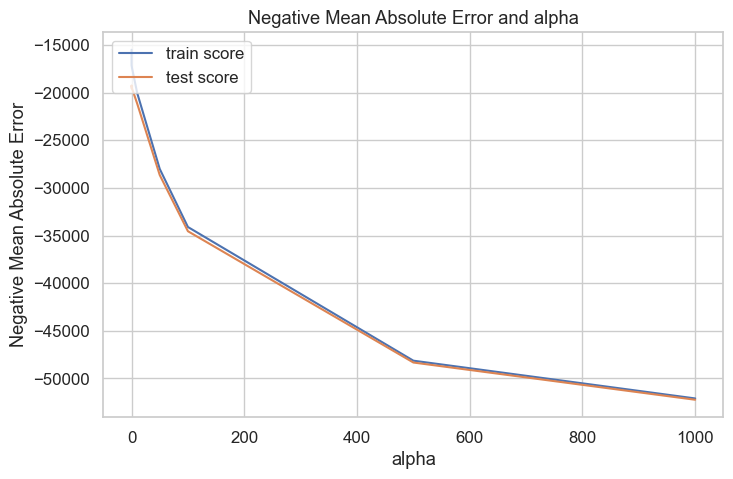

In [1009]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

We see that alpha is somewhere between 0- 20 So sleting parameters according to that.

In [1011]:

# list of alphas to tune
params = {'alpha': [0.001,0.01, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1012]:
cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results = cv_results[cv_results['param_alpha']<=20]
cv_results.head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.021919      0.005929         0.010466        0.005046       0.001   
1       0.025242      0.004017         0.011416        0.004390        0.01   
2       0.026302      0.006923         0.013378        0.003515         1.0   
3       0.025876      0.006597         0.013202        0.003488         2.0   
4       0.025020      0.004153         0.012520        0.001628         3.0   
5       0.018543      0.001698         0.012446        0.006805         4.0   
6       0.027395      0.002884         0.009747        0.000982         5.0   
7       0.024409      0.005437         0.011637        0.002630         6.0   
8       0.046810      0.051790         0.020409        0.020994         7.0   
9       0.024640      0.004671         0.010996        0.005903         8.0   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}      -17913.710921      -20938.018062      -20084.246501   
1   {'alpha': 0.01}      -17894.339190      -20922.450188      -19940.799951   
2    {'alpha': 1.0}      -19188.553293      -20826.520613      -20235.575836   
3    {'alpha': 2.0}      -19059.636222      -21062.936350      -20198.726483   
4    {'alpha': 3.0}      -18948.508786      -21263.871844      -20317.331936   
5    {'alpha': 4.0}      -18922.335529      -21524.177577      -20526.626377   
6    {'alpha': 5.0}      -19009.104117      -21769.225085      -20823.402545   
7    {'alpha': 6.0}      -19156.176583      -22024.028187      -21118.847386   
8    {'alpha': 7.0}      -19321.521206      -22284.405152      -21395.206660   
9    {'alpha': 8.0}      -19483.073989      -22550.177881      -21659.443938   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -20842.085953  ...    -19415.879260     1518.255219                2   
1      -20277.835868  ...    -19278.232242     1396.625059                1   
2      -18585.048879  ...    -19599.137240      812.567639                3   
3      -18758.730386  ...    -19641.330394      861.850215                4   
4      -18991.789471  ...    -19734.645819      915.171745                5   
5      -19173.905402  ...    -19882.888550      991.198875                6   
6      -19326.254580  ...    -20077.603076     1049.324938                7   
7      -19473.870653  ...    -20289.539098     1097.630902                8   
8      -19622.185491  ...    -20500.950316     1142.583723                9   
9      -19783.978480  ...    -20714.006523     1185.810137               10   

   split0_train_score  split1_train_score  split2_train_score  \
0       -15527.577583       -15185.479491       -15615.557530   
1       -15595.710310       -15180.042129       -15661.062151   
2       -18007.871399       -15682.442658       -17514.942627   
3       -18426.742670       -16204.925381       -17712.587504   
4       -18744.597395       -16601.592918       -17917.799545   
5       -19050.049978       -16956.359149       -18139.634978   
6       -19334.740695       -17322.107910       -18362.166199   
7       -19601.938403       -17670.061738       -18575.427559   
8       -19857.372112       -17996.171226       -18804.988212   
9       -20112.532928       -18300.699173       -19042.783713   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0       -15799.719337       -15405.691884     -15506.805165       205.684889  
1       -15808.466585       -15455.483267     -15540.152888       212.859870  
2       -18104.487884       -18056.510696     -17473.251053       920.130812  
3       -18479.684402       -18513.640196     -17867.516031       882.402573  
4       -18777.655457       -18814.208310     -18171.170725       852.984251  
5       -19039.859370       -19080.833265     -18453.347348       828.634790  
6       -19303.577333       -19345.391479     -18733.596723       798.849935  
7       -19561.202660       -19602

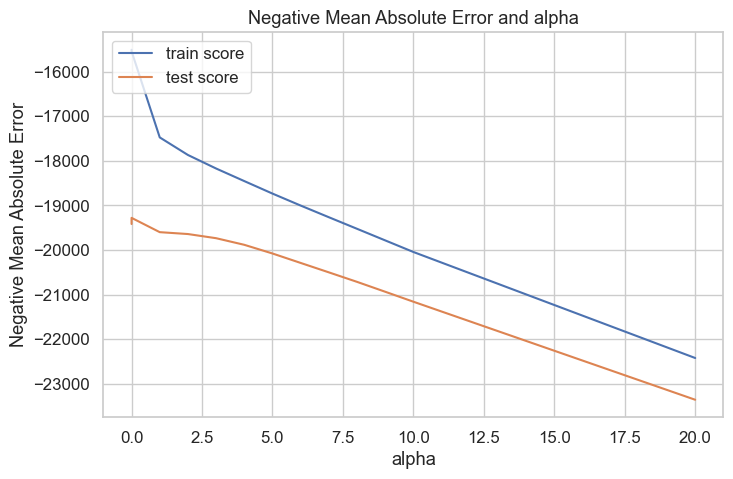

In [1013]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

We see that the optimal alpha value is between 0-2

In [1014]:
# Finding out the best score and Optimum value of alpha
print(model_cv.best_estimator_)
best_ridge_score = model_cv.best_score_
best_ridge_alpha = model_cv.best_params_["alpha"]

print(" The best r2 score is obtained at alpha {0}".format(best_ridge_alpha))

Ridge(alpha=0.01)
 The best r2 score is obtained at alpha 0.01


## Building ridge regression model with optimal alpha value

In [1051]:
# Model building using optimal alpha
#ridge = Ridge(alpha=best_ridge_alpha)
ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train)

Ridge(alpha=0.01)

In [1052]:
#creating coeffcients for the ridge regression
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = house_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']

We are finding the absolute value of coefficient because negative coefficient is also as important as positive one and conveys that the vairbale is negatively related to the target variable Sale price ." For instance we just find the top 10 coefficents then 0.00 will be more important than a variable with -0.1 coefficent. but in relaility the variable with -0.1 is more important to predict saleprice rather than 0.0 because 0.0 shows that that variable can be excluded and is insignificant where as -0.1 shows that the variable is needed to predict the Sale price.



In [1056]:
#selecting the top 10 variables
ridge_coef.sort_values(by='Mod',ascending=False).head(10)

Features    Coefficient            Mod
0               MSZoning -721509.950916  721509.950916
58  Neighborhood_ClearCr  716988.770120  716988.770120
53         LandSlope_Mod  675892.911022  675892.911022
54         LandSlope_Sev  647058.289671  647058.289671
55  Neighborhood_Blueste  641812.405334  641812.405334
52      LotConfig_Inside  640333.619351  640333.619351
56   Neighborhood_BrDale  635036.703493  635036.703493
57  Neighborhood_BrkSide  628026.487646  628026.487646
41         EnclosedPorch -416120.506173  416120.506173
8              YearBuilt  163916.918166  163916.918166

In [1054]:
# Prediction using ridge regression
y_train_ridge_pred = ridge.predict(X_train)
print("Ridge regression train r2: ",round(metrics.r2_score(y_true=y_train, y_pred=y_train_ridge_pred),4))
y_test_ridge_pred = ridge.predict(X_test)
print("Ridge regression test r2: ",round(metrics.r2_score(y_true=y_test, y_pred=y_test_ridge_pred),4))

Ridge regression train r2:  0.9176
Ridge regression test r2:  0.8165


## Lasso Regression model

In [1067]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1068]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.109041      0.021556         0.015934        0.009260      0.0001   
1       0.121519      0.045805         0.012094        0.004920       0.001   
2       0.078672      0.012215         0.014549        0.004812        0.01   
3       0.119725      0.096133         0.010250        0.003873        0.05   
4       0.063120      0.013514         0.012762        0.004233         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -17923.992826      -20951.473612      -20113.137240   
1   {'alpha': 0.001}      -17923.950870      -20950.687723      -20113.080194   
2    {'alpha': 0.01}      -17923.531306      -20949.109866      -20112.509791   
3    {'alpha': 0.05}      -17921.666653      -20947.125377      -20109.974677   
4     {'alpha': 0.1}      -17919.346262      -20944.220874      -20106.807177   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -20841.855707  ...    -19419.706835     1530.773886               20   
1      -20848.979837  ...    -19421.569552     1531.081915               21   
2      -20863.518246  ...    -19427.296917     1528.846318               24   
3      -20862.071723  ...    -19425.603981     1528.496547               23   
4      -20861.620684  ...    -19423.676856     1528.228537               22   

   split0_train_score  split1_train_score  split2_train_score  \
0       -15525.753032       -15186.149935       -15619.035025   
1       -15525.754029       -15186.150711       -15619.029449   
2       -15525.764034       -15186.151247       -15618.973701   
3       -15525.808515       -15186.159970       -15618.725933   
4       -15525.864126       -15186.170100       -15618.416507   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0       -15803.606832       -15404.537583     -15507.816481       207.035801  
1       -15803.611059       -15404.547853     -15507.818620       207.035161  
2       -15803.654900       -15404.645519     -15507.837880       207.031969  
3       -15803.849174       -15405.081979     -15507.925114       207.015557  
4       -15804.092336       -15405.627506     -15508.034115       206.995753  

[5 rows x 21 columns]

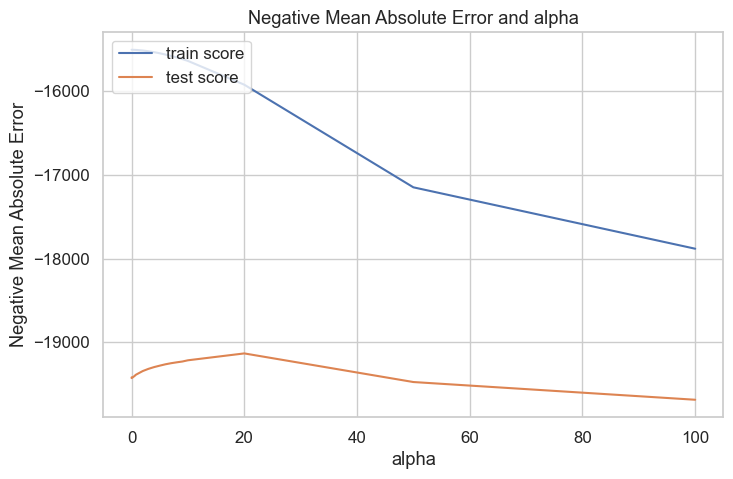

In [1069]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


This graphs shows that alpha value might be ver less than 1

In [1080]:
# list of alphas to tune
params = {'alpha': [0.001,0.01,0.5, 1.0, 10.0, 50, 100,500, 1000]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.5, 1.0, 10.0, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1081]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.101911      0.040344         0.013860        0.007496       0.001   
1       0.077948      0.014481         0.010617        0.001754        0.01   
2       0.049851      0.015597         0.010770        0.005315         0.5   
3       0.076448      0.030416         0.009820        0.001100         1.0   
4       0.144816      0.014345         0.011296        0.004794        10.0   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}      -17923.950870      -20950.687723      -20113.080194   
1   {'alpha': 0.01}      -17923.531306      -20949.109866      -20112.509791   
2    {'alpha': 0.5}      -17903.426822      -20922.955783      -20082.228631   
3    {'alpha': 1.0}      -17887.483123      -20892.333504      -20054.605757   
4   {'alpha': 10.0}      -17803.849381      -20759.578327      -19815.979072   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -20848.979837  ...    -19421.569552     1531.081915                4   
1      -20863.518246  ...    -19427.296917     1528.846318                5   
2      -20829.715296  ...    -19403.678214     1520.704182                3   
3      -20789.046288  ...    -19379.144160     1509.825225                2   
4      -20363.135171  ...    -19215.149878     1385.467548                1   

   split0_train_score  split1_train_score  split2_train_score  \
0       -15525.754029       -15186.150711       -15619.029449   
1       -15525.764034       -15186.151247       -15618.973701   
2       -15526.435745       -15186.567586       -15616.501333   
3       -15528.014192       -15187.798255       -15614.506945   
4       -15693.310559       -15251.304217       -15721.653352   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0       -15803.611059       -15404.547853     -15507.818620       207.035161  
1       -15803.654900       -15404.645519     -15507.837880       207.031969  
2       -15806.154017       -15410.006554     -15509.133047       206.844544  
3       -15809.629722       -15415.860037     -15511.161830       206.733515  
4       -15905.167114       -15633.744758     -15641.036000       214.914428  

[5 rows x 21 columns]

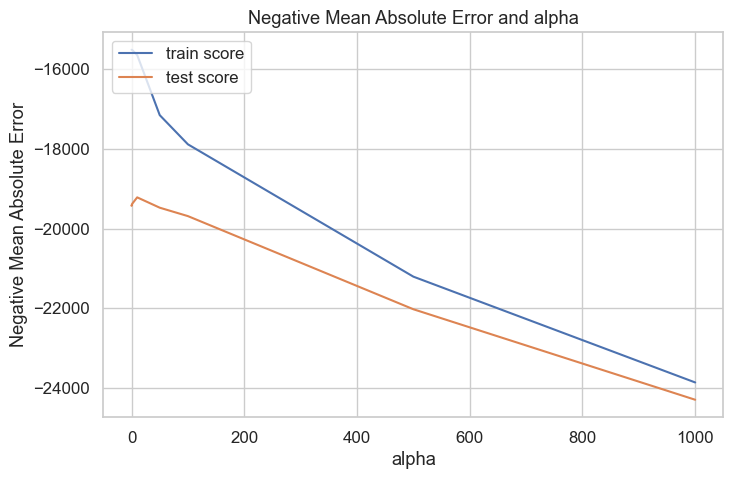

In [1082]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1089]:
# list of alphas to tune
params ={'alpha':  [100,500, 1000,2000]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [100, 500, 1000, 2000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1090]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.042663      0.010266         0.014947        0.004200         100   
1       0.028323      0.005871         0.011168        0.002749         500   
2       0.027767      0.004821         0.016333        0.003856        1000   
3       0.028686      0.008272         0.013133        0.003885        2000   

            params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 100}      -18879.760526      -21105.840669      -20679.406375   
1   {'alpha': 500}      -19907.382729      -24008.391885      -22858.932172   
2  {'alpha': 1000}      -21864.729847      -26392.903300      -24733.447058   
3  {'alpha': 2000}      -26036.823931      -32080.926847      -29170.049835   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -18821.021000  ...    -19686.189331      995.009220                1   
1      -22169.437662  ...    -22025.312857     1403.167290                2   
2      -24487.011252  ...    -24298.300472     1457.103522                3   
3      -26495.769203  ...    -28540.752080     2169.075276                4   

   split0_train_score  split1_train_score  split2_train_score  \
0       -18505.163024       -15937.280859       -18167.027205   
1       -22007.831408       -19592.560365       -20940.172031   
2       -24393.596876       -22466.391101       -23810.772328   
3       -28484.212358       -27649.395206       -27923.174654   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0       -18277.122261       -18529.263669     -17883.171404       982.503964  
1       -21611.727078       -21880.829642     -21206.624105       887.332309  
2       -24206.866161       -24441.038161     -23863.732926       733.095704  
3       -28018.297933       -28853.187303     -28185.653491       428.769112  

[4 rows x 21 columns]

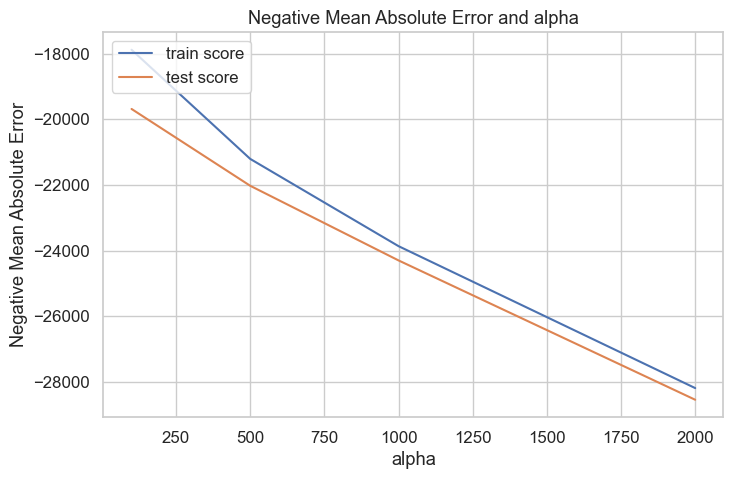

In [1091]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1092]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 100}

Tunning it more

In [1093]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.042663      0.010266         0.014947        0.004200         100   
1       0.028323      0.005871         0.011168        0.002749         500   
2       0.027767      0.004821         0.016333        0.003856        1000   
3       0.028686      0.008272         0.013133        0.003885        2000   

            params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 100}      -18879.760526      -21105.840669      -20679.406375   
1   {'alpha': 500}      -19907.382729      -24008.391885      -22858.932172   
2  {'alpha': 1000}      -21864.729847      -26392.903300      -24733.447058   
3  {'alpha': 2000}      -26036.823931      -32080.926847      -29170.049835   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -18821.021000  ...    -19686.189331      995.009220                1   
1      -22169.437662  ...    -22025.312857     1403.167290                2   
2      -24487.011252  ...    -24298.300472     1457.103522                3   
3      -26495.769203  ...    -28540.752080     2169.075276                4   

   split0_train_score  split1_train_score  split2_train_score  \
0       -18505.163024       -15937.280859       -18167.027205   
1       -22007.831408       -19592.560365       -20940.172031   
2       -24393.596876       -22466.391101       -23810.772328   
3       -28484.212358       -27649.395206       -27923.174654   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0       -18277.122261       -18529.263669     -17883.171404       982.503964  
1       -21611.727078       -21880.829642     -21206.624105       887.332309  
2       -24206.866161       -24441.038161     -23863.732926       733.095704  
3       -28018.297933       -28853.187303     -28185.653491       428.769112  

[4 rows x 21 columns]

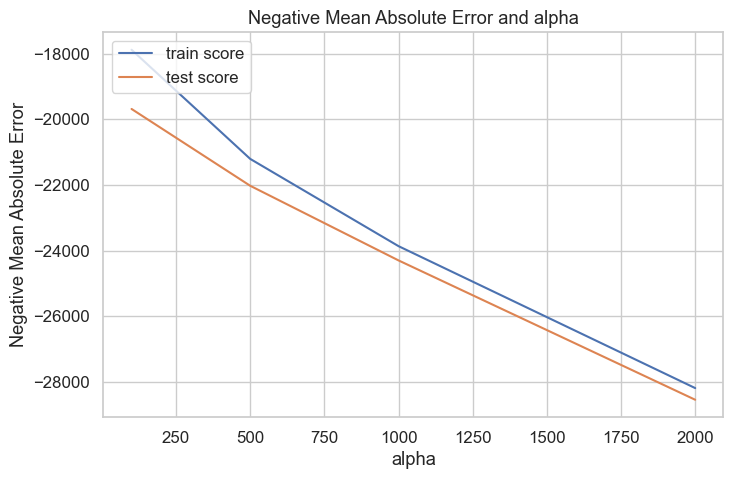

In [1094]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1131]:
# list of alphas to tune
params = {'alpha': [100,1000,1500,1900,2000,2500,3000,4000,5000,6000]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [100, 1000, 1500, 1900, 2000, 2500, 3000,
                                   4000, 5000, 6000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1132]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.038798      0.004402         0.013114        0.002988         100   
1       0.029085      0.003859         0.012051        0.003495        1000   
2       0.027036      0.004777         0.010725        0.003202        1500   
3       0.026121      0.006939         0.008425        0.002683        1900   
4       0.019347      0.006555         0.006708        0.003718        2000   

            params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 100}      -18879.760526      -21105.840669      -20679.406375   
1  {'alpha': 1000}      -21864.729847      -26392.903300      -24733.447058   
2  {'alpha': 1500}      -23735.450653      -29548.343959      -26918.134270   
3  {'alpha': 1900}      -25645.757592      -31598.729265      -28737.279085   
4  {'alpha': 2000}      -26036.823931      -32080.926847      -29170.049835   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -18821.021000  ...    -19686.189331      995.009220                1   
1      -24487.011252  ...    -24298.300472     1457.103522                2   
2      -25646.419286  ...    -26472.431076     1888.648231                3   
3      -26293.766345  ...    -28142.069063     2099.345977                4   
4      -26495.769203  ...    -28540.752080     2169.075276                5   

   split0_train_score  split1_train_score  split2_train_score  \
0       -18505.163024       -15937.280859       -18167.027205   
1       -24393.596876       -22466.391101       -23810.772328   
2       -26447.079653       -25420.259145       -25914.058825   
3       -28128.390988       -27193.182734       -27545.907985   
4       -28484.212358       -27649.395206       -27923.174654   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0       -18277.122261       -18529.263669     -17883.171404       982.503964  
1       -24206.866161       -24441.038161     -23863.732926       733.095704  
2       -26196.599656       -26726.054470     -26140.810350       449.451734  
3       -27632.220570       -28449.497139     -27789.839883       444.996836  
4       -28018.297933       -28853.187303     -28185.653491       428.769112  

[5 rows x 21 columns]

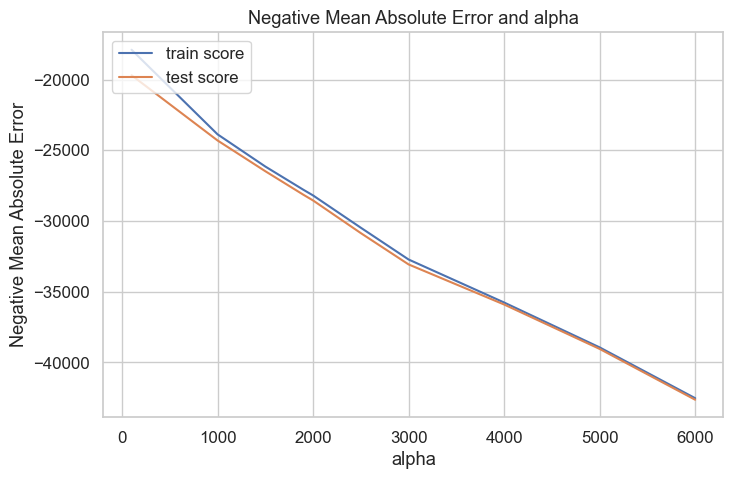

In [1133]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1135]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 100}

In [1140]:
# list of alphas to tune
params = {'alpha': [100,3000,5000,6000]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [100, 3000, 5000, 6000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1141]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.049337      0.012699         0.013918        0.004609         100   
1       0.024039      0.006253         0.013711        0.005335        3000   
2       0.029291      0.003299         0.013123        0.002133        5000   
3       0.043495      0.007676         0.016543        0.004565        6000   

            params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 100}      -18879.760526      -21105.840669      -20679.406375   
1  {'alpha': 3000}      -30820.673049      -37135.546232      -33614.171548   
2  {'alpha': 5000}      -37614.234296      -42761.391468      -38403.998422   
3  {'alpha': 6000}      -41431.346909      -46172.991348      -41605.842718   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -18821.021000  ...    -19686.189331      995.009220                1   
1      -29720.053998  ...    -33064.907477     2609.051305                2   
2      -35037.613383  ...    -39040.576265     2749.807335                3   
3      -38311.554563  ...    -42634.499991     2926.169594                4   

   split0_train_score  split1_train_score  split2_train_score  \
0       -18505.163024       -15937.280859       -18167.027205   
1       -33056.178606       -32319.055819       -32269.483237   
2       -39158.829609       -38375.949034       -38670.477357   
3       -42619.992455       -42005.507073       -42437.912786   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0       -18277.122261       -18529.263669     -17883.171404       982.503964  
1       -32716.499418       -33221.285859     -32716.500588       381.569438  
2       -39079.964654       -39376.722584     -38932.388648       360.197002  
3       -42508.586130       -43050.431784     -42524.486046       335.507766  

[4 rows x 21 columns]

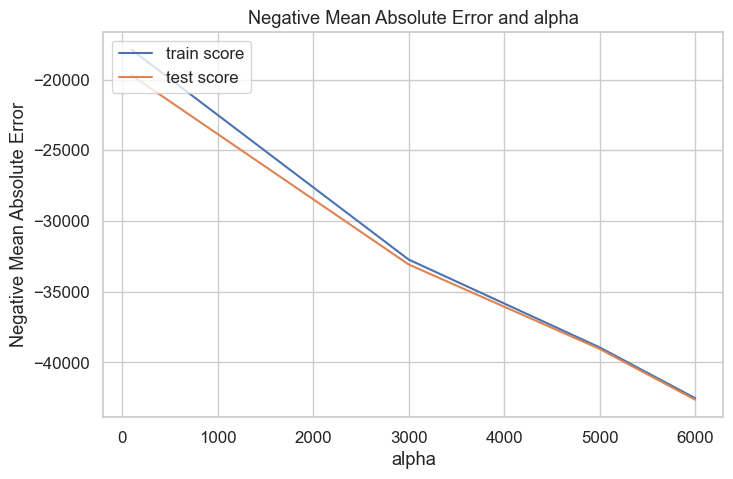

In [1142]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


In [1143]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 100}

## Building Lasso regression model with optimal alpha value

In [1144]:
# After performing grid search we found the same alpha that ue use before
lasso = Lasso(alpha=100)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.8605104044337748
Lasso Regression test r2: 0.8465383975804457


In [1145]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_test.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

We are finding the absolute value of coefficient because negative coefficient is also as important as positive one and conveys that the vairbale is negatively related to the target variable Sale price ." For instance we just find the top 10 coefficents then 0.00 will be more important than a variable with -0.1 coefficent. but in relaility the variable with -0.1 is more important to predict saleprice rather than 0.0 because 0.0 shows that that variable can be excluded and is insignificant where as -0.1 shows that the variable is needed to predict the Sale price.

In [1146]:
lasso_coef

Feature           Coef            mod
0             LotFrontage  -91444.913075   91444.913075
1                 LotArea      -0.000000       0.000000
2                  Street   16239.867936   16239.867936
3             OverallQual       0.000000       0.000000
4             OverallCond  133496.051789  133496.051789
..                    ...            ...            ...
85           SaleType_New      -0.000000       0.000000
86           SaleType_Oth   14557.288286   14557.288286
87            SaleType_WD       0.000000       0.000000
88  SaleCondition_AdjLand    1472.089985    1472.089985
89  SaleCondition_Partial       0.000000       0.000000

[90 rows x 3 columns]

In [1147]:
#selecting the top 10 variables
lasso_coef.sort_values(by='mod',ascending=False).head(10)

Feature           Coef            mod
15          BedroomAbvGr  296727.471630  296727.471630
41       Condition2_RRAe -197270.954885  197270.954885
4            OverallCond  133496.051789  133496.051789
58   Exterior1st_AsphShn  104713.673032  104713.673032
0            LotFrontage  -91444.913075   91444.913075
8             BsmtFinSF2   83715.361342   83715.361342
18            WoodDeckSF   58621.834486   58621.834486
6               BsmtQual   52071.873956   52071.873956
33  Neighborhood_Somerst   48540.078662   48540.078662
32  Neighborhood_NridgHt   46006.930157   46006.930157

In [1148]:
lasso.coef_

array([     -0.        ,   16239.86793591,       0.        ,
        133496.05178912,   42169.75289685,   52071.8739557 ,
           502.02623964,   83715.36134161,   10886.29997624,
            -0.        ,       0.        ,       0.        ,
             0.        ,   -7365.62694301,  296727.47163019,
        -19415.44713744,  -32589.98184724,   58621.83448572,
         17904.76376259,    1982.01206205,       0.        ,
          9571.49680279,      -0.        ,      -0.        ,
         13562.40788017,   18679.84524756,       0.        ,
         25780.27647244,   -5321.97498997,   -1813.40687116,
         -5179.96803085,   46006.93015734,   48540.07866184,
         14847.7807918 ,   22011.75705923,   12112.82054147,
          5957.72263261,   -4012.69592102,    1407.44354743,
             0.        , -197270.95488481,      -0.        ,
        -34783.8998437 ,  -20274.98528758,     384.68354094,
         11561.32511179,      -0.        ,      -0.        ,
             0.        ,

## Data Modeling and evaluation - Final model

We will make use of Lasso Regression model because it is using less numbers of variables and giving almost the same accuract. Its more efficient model than Ridge regression model

In [1164]:
# We have used lasso for building the modle as we got the optimal value of alpha.
lasso = Lasso(alpha = 100)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true = y_train,y_pred = y_train_pred))
print(r2_score(y_true = y_test,y_pred = y_test_pred))

0.8605104044337748
0.8465383975804457


## Optimal value of alpha:
- For Ridge regression :0.01
- For Lasso Regression 100

## Model Inference and Conclusion

Below Variables play a pivotal role in determining the price: 

- LotFrontage : If the house Linear feet of street connected to property area increase then the Price increase.
- LandSlope :If the slope of the house is moderate and severe the price is low
- Neighborhood : :Clear Creek,Briardale,Brookside,Somerset and Northridge Heights have higer price 
- EnclosedPorch:Higher Enclosed porch area  has higher price
- YearBuilt : Older the house built lower is the price
- Overall Condition: If the Overall Condition is Excellent the SalePrice is higher
- MSZoning_RH : If the house i near residential area then the SalePrice is higher
- Exterior1st_AsphShn : IF the house Exterior1st is Asphalt Shingles then price is high.
- Garage Area: If the Garage area is high the SalePrice is higher
- WoodDeckSF: Higher the Wood deck area greater is the price
      
      
How well those variables describe the price of a house.

These varibles tells about the linear relation with respect the price by which the company can improve ther sales. 
For instance they can concentrate in investing properties wich may have high SalePrice in future

## Subjective Question 

What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

For Ridge regression aplha is 0.001 and now doubling it and making it 0.02

In [1151]:
# Model building using optimal alpha
ridge_modified = Ridge(alpha=0.02)
ridge_modified.fit(X_train, y_train)

Ridge(alpha=0.02)

In [1152]:
#creating coeffcients for the ridge regression
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = house_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']
#selecting the top 10 variables
ridge_coef.sort_values(by='Mod',ascending=False).head(10)

Features    Coefficient            Mod
0               MSZoning -721509.950916  721509.950916
58  Neighborhood_ClearCr  716988.770120  716988.770120
53         LandSlope_Mod  675892.911022  675892.911022
54         LandSlope_Sev  647058.289671  647058.289671
55  Neighborhood_Blueste  641812.405334  641812.405334
52      LotConfig_Inside  640333.619351  640333.619351
56   Neighborhood_BrDale  635036.703493  635036.703493
57  Neighborhood_BrkSide  628026.487646  628026.487646
41         EnclosedPorch -416120.506173  416120.506173
8              YearBuilt  163916.918166  163916.918166

In [1153]:
y_train_pred = ridge_modified.predict(X_train)
y_test_pred = ridge_modified.predict(X_test)

print("Ridge Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Ridge Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Ridge Regression train r2: 0.9161331770226779
Ridge Regression test r2: 0.8204004440475331


### For Lasso regression alpha is 100 and not doubling it and making it 200

In [1165]:
    # Model building using optimal alpha
lasso_modified = Lasso(alpha=200)
lasso_modified.fit(X_train, y_train)

Lasso(alpha=200)

In [1166]:
y_train_pred = lasso_modified.predict(X_train)
y_test_pred = lasso_modified.predict(X_test)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.8427816431976055
Lasso Regression test r2: 0.8433628654015475


In [1167]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

In [1168]:
#selecting the top 10 variables
lasso_coef.sort_values(by='mod',ascending=False).head(10)

Feature           Coef            mod
15          BedroomAbvGr  296727.471630  296727.471630
41       Condition2_RRAe -197270.954885  197270.954885
4            OverallCond  133496.051789  133496.051789
58   Exterior1st_AsphShn  104713.673032  104713.673032
0            LotFrontage  -91444.913075   91444.913075
8             BsmtFinSF2   83715.361342   83715.361342
18            WoodDeckSF   58621.834486   58621.834486
6               BsmtQual   52071.873956   52071.873956
33  Neighborhood_Somerst   48540.078662   48540.078662
32  Neighborhood_NridgHt   46006.930157   46006.930157